In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import pymc3 as pm
import scipy.stats as stats
from copy import deepcopy
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')

#### $P(Head)$ Approximating the probability by the long-run relative frequency.

In [11]:
no_of_experiment = 100
process = np.random.randint(0,2,no_of_experiment)
trace_head_prob = []
for i in range(0,no_of_experiment,1):
    trace_head_prob.append(np.sum(process[:i+1])/(i+1))

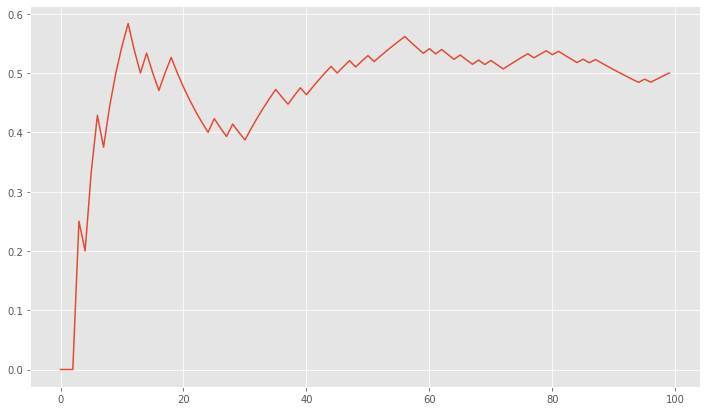

In [12]:
plt.plot(trace_head_prob)

### Normal Distribution

/home/quantiphi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


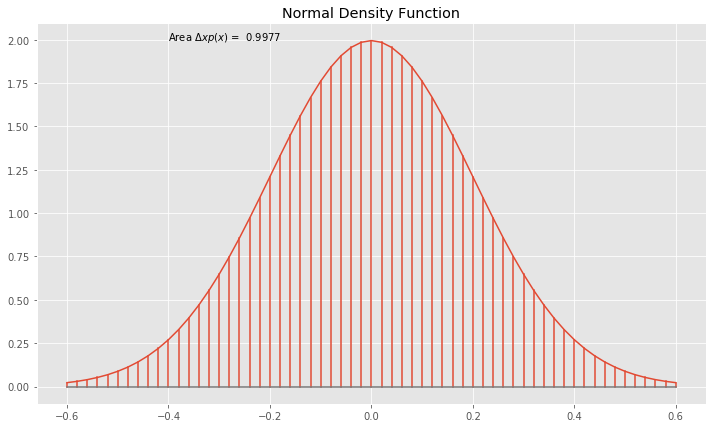

In [13]:
mean = 0.0
std_dev = 0.2
xmin = mean - 3*std_dev
xmax = mean + 3*std_dev
dx  = 0.02
x = np.arange(xmin,xmax,dx)

y = (1/(np.sqrt(2*np.pi*(std_dev**2))))*(np.exp(-((x-mean)**2)/(2*(std_dev**2))))
plt.title("Normal Density Function")
plt.plot(x,y)
plt.stem(x,y,markerfmt=" ");
area = np.round(np.sum(dx*y),4)
plt.text(-0.4,2,"Area $\Delta x p(x) $ =  {}".format(area));

#### Bayes

In [14]:
n_theta_vals = 3.
# Now make the vector of theta values:
theta = np.linspace(1/(n_theta_vals +1), n_theta_vals /(n_theta_vals +1), n_theta_vals )
print("theta ",theta)
# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.
print("p_theta " , p_theta)
# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
data = np.repeat([1, 0], [3, 9])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails
print("p_data_given_theta",p_data_given_theta)
# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!
print("p_theta_given_data",p_theta_given_data)

theta  [0.25 0.5  0.75]
p_theta  [0.25 0.5  0.25]
p_data_given_theta [1.17319822e-03 2.44140625e-04 1.60932541e-06]
p_theta_given_data [0.7054333  0.29359903 0.00096767]


/home/quantiphi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/quantiphi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/quantiphi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/quantiphi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performanc

<StemContainer object of 3 artists>

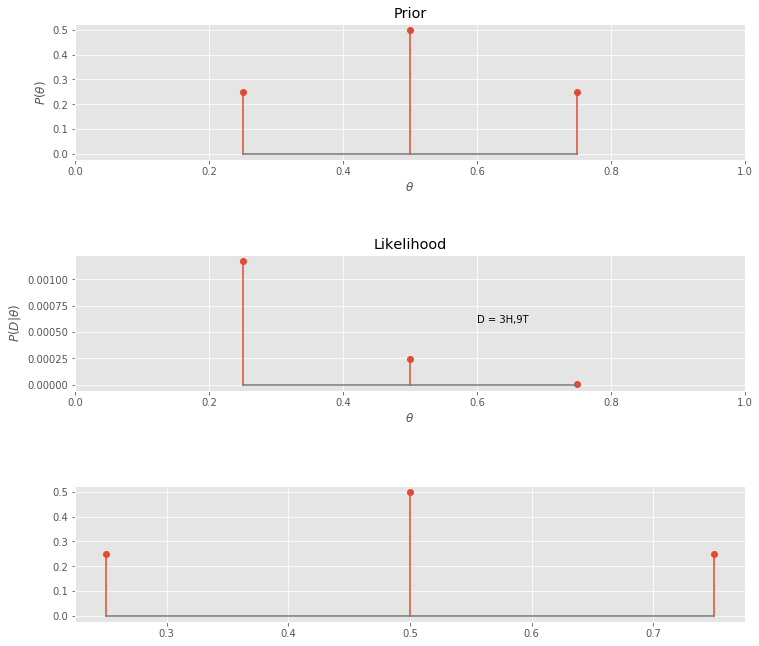

In [15]:
# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3,1,1)
plt.stem(theta,p_theta)
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')


plt.subplot(3,1,2)
plt.stem(theta,p_data_given_theta);
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))


plt.subplot(3,1,3)
plt.stem(theta,p_theta)

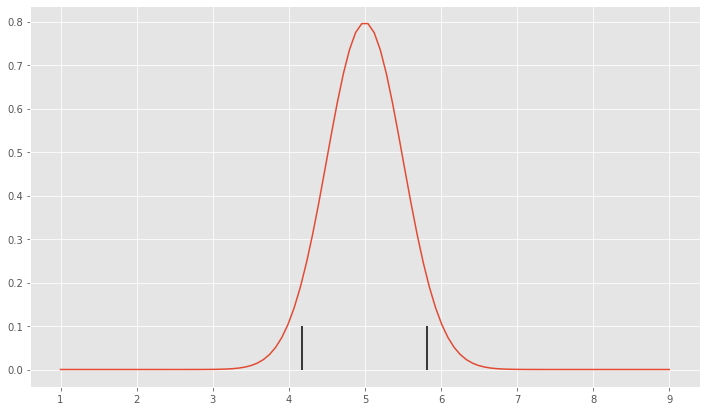

In [16]:
ax = plt.subplot()
x = np.linspace(1,9,100)
a = stats.norm.pdf(x=x, loc=5, scale = .5)
#print(a)
ax.plot(x,a)
q= stats.norm.ppf([0.05,.95],loc=5,scale=0.5)

ax.vlines(x=q,ymin=0,ymax=.1);
#ax.fill_between()

_____________________________
Houses less than 70
0.5987063256829237


Houses more than 70
0.4012936743170763


Houses between 60-80
0.19
_____________________________


top 5 per expensive houses
125.79414507805892
_____________________________


top 5 per expensive houses
-5.794145078058918
_____________________________




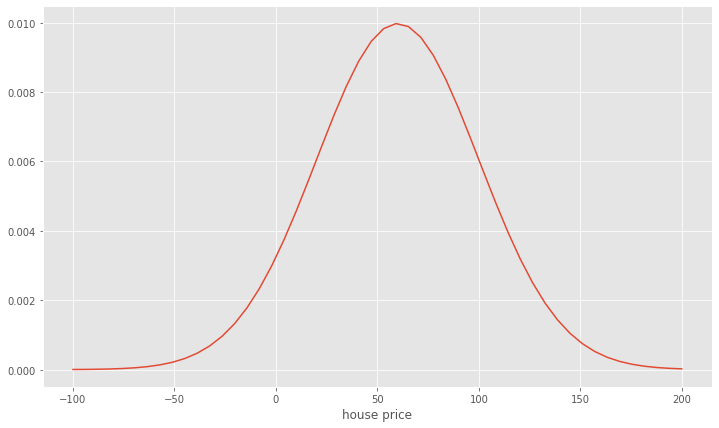

In [25]:
import scipy as sc
import scipy.stats as sct
x = np.linspace(-100,200)
y = sct.norm.pdf(x=x,loc=60,scale=40)
plt.plot(x,y)
plt.xlabel("house price")

print("_____________________________")
print("Houses less than 70")
print(sct.norm.cdf(x=70,loc=60,scale=40))
print("\n")

print("Houses more than 70")
print(sct.norm.sf(x=70,loc=60,scale=40))


print("\n")
print("Houses between 60-80")
pp  = sct.norm.cdf(x=80,loc=60,scale=40) - sct.norm.cdf(x=60,loc=60,scale=40)
print("{:.2f}".format(pp))
print("_____________________________")
print("\n")


print("""top 5 per expensive houses""")

print(sct.norm.isf(q=0.05,loc=60,scale=40))


print("_____________________________")
print("\n")

print("""top 5 per expensive houses""")

print(sct.norm.ppf(q=0.05,loc=60,scale=40))


print("_____________________________")
print("\n")



In [72]:
def hpd(x, alpha=0.05):
    """Calculate highest posterior density (HPD) of array for given alpha. 
    The HPD is the minimum width Bayesian credible interval (BCI).
    :Arguments:
        x : Numpy array
        An array containing MCMC samples
        alpha : float
        Desired probability of type I error (defaults to 0.05)
    """

    # Make a copy of trace
    x = x.copy()
    # For multivariate node
    if x.ndim > 1:
        # Transpose first, then sort
        tx = np.transpose(x, list(range(x.ndim))[1:]+[0])
        dims = np.shape(tx)
        # Container list for intervals
        intervals = np.resize(0.0, dims[:-1]+(2,))

        for index in make_indices(dims[:-1]):
            try:
                index = tuple(index)
            except TypeError:
                pass

            # Sort trace
            sx = np.sort(tx[index])
            # Append to list
            intervals[index] = calc_min_interval(sx, alpha)
        # Transpose back before returning
        return np.array(intervals)
    else:
        # Sort univariate node
        sx = np.sort(x)
        return np.array(calc_min_interval(sx, alpha))
    
def plot_post(param_sample_vec, cred_mass=0.95, comp_val=False,
              ROPE=False, ylab='', xlab='parameter', fontsize=14, labelsize=14,
              title='', framealpha=1, facecolor='skyblue', edgecolor='white',
              show_mode=True, bins=50):
    
    #compute HDI
    HDI = hpd(param_sample_vec, 1-cred_mass)

    post_summary = {'mean':0,'median':0,'mode':0, 'hdi_mass':0,'hdi_low':0,
                   'hdi_high':0, 'comp_val':0, 'pc_gt_comp_val':0, 'ROPE_low':0,
                   'ROPE_high':0, 'pc_in_ROPE':0}
    post_summary['mean'] = np.mean(param_sample_vec)
    post_summary['median'] = np.median(param_sample_vec)
    post_summary['mode'] = stats.mode(param_sample_vec)[0]
    post_summary['hdi_mass'] = cred_mass
    post_summary['hdi_low'] = HDI[0]
    post_summary['hdi_high'] = HDI[1]

    # Plot histogram.
    n, bins, patches = plt.hist(param_sample_vec, density=True, bins=bins,
                                edgecolor=edgecolor, facecolor=facecolor)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)

    cv_ht = 0.75*np.max(n)
    cen_tend_ht = 0.9 * cv_ht
    ROPE_text_ht = 0.55 * cv_ht
#    # Display mean or mode:
    if show_mode:
        plt.plot(0, label='mode = %.2f' % post_summary['mode'], alpha=0)
    else:
        plt.plot(0, label='mean = %.2f' % post_summary['mean'], alpha=0)
    # Display the comparison value.

    if comp_val is not False:
        pc_gt_comp_val = 100 * np.sum(param_sample_vec > comp_val)/len(param_sample_vec)
        pc_lt_comp_val = 100 - pc_gt_comp_val
        plt.plot([comp_val, comp_val], [0, cv_ht], color='darkgreen',
                 linestyle='--', linewidth=2,
                 label='%.1f%% <%.1f < %.1f%%'
                 % (pc_lt_comp_val, comp_val, pc_gt_comp_val))
        post_summary['comp_val'] = comp_val
        post_summary['pc_gt_comp_val'] = pc_gt_comp_val
#    # Display the ROPE.
    if ROPE is not False:
        rope_col = 'darkred'
        pc_in_ROPE = round(np.sum((param_sample_vec > ROPE[0]) & (param_sample_vec < ROPE[1]))/len(param_sample_vec)*100)
        plt.plot([ROPE[0], ROPE[0]], [0, 0.96*ROPE_text_ht], color=rope_col,
                linestyle=':', linewidth=4,
                label='%.1f%% in ROPE' % pc_in_ROPE)
        plt.plot([ROPE[1], ROPE[1]], [0, 0.96*ROPE_text_ht], color=rope_col,
                linestyle=':', linewidth=4)
        post_summary['ROPE_low'] = ROPE[0] 
        post_summary['ROPE_high'] = ROPE[1] 
        post_summary['pc_in_ROPE'] = pc_in_ROPE
#    # Display the HDI.
    plt.plot(HDI, [0, 0], linewidth=6, color='k', label='HDI %.1f%% %.3f-%.3f' % (cred_mass*100, HDI[0], HDI[1]))
    plt.legend(loc='upper left', fontsize=labelsize, framealpha=framealpha)
    return post_summary

def calc_min_interval(x, alpha):
    """Internal method to determine the minimum interval of a given width
    Assumes that x is sorted numpy array.
    """

    n = len(x)
    cred_mass = 1.0-alpha

    interval_idx_inc = int(np.floor(cred_mass*n))
    n_intervals = n - interval_idx_inc
    interval_width = x[interval_idx_inc:] - x[:n_intervals]

    if len(interval_width) == 0:
        raise ValueError('Too few elements for interval calculation')

    min_idx = np.argmin(interval_width)
    hdi_min = x[min_idx]
    hdi_max = x[min_idx+interval_idx_inc]
    return hdi_min, hdi_max

### PYMC Binomial Proportion

In [73]:
y_Data  = np.repeat((1,0),(7,3))
print(y_Data)

with pm.Model() as model:
    
    theta = pm.Beta('theta',1,1)
    y = pm.Bernoulli("y",p=theta, observed = y_Data) 
    
    trace = pm.sample(10000,step = pm.Metropolis())

[1 1 1 1 1 1 1 0 0 0]


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:03<00:00, 5540.73draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c3e480828>,
      dtype=object)

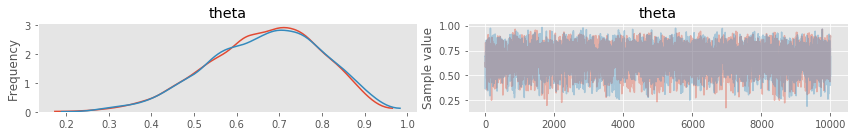

In [74]:
pm.traceplot(trace)

In [75]:
trace_sample = trace['theta']

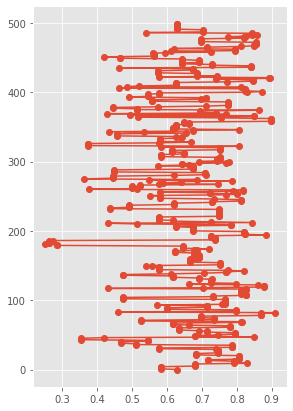

In [76]:
plt.figure(figsize=(10,7))
ax = plt.subplot(1,2,1)
plt.plot(trace_sample[:500],np.arange(500),'-o')


In [77]:
hpd(trace['theta'],0.05)

array([0.41885732, 0.91116924])

{'mean': 0.6656601579388147,
 'median': 0.6756187912598051,
 'mode': array([0.63569341]),
 'hdi_mass': 0.95,
 'hdi_low': 0.41885732178168716,
 'hdi_high': 0.9111692440391936,
 'comp_val': 0,
 'pc_gt_comp_val': 0,
 'ROPE_low': 0,
 'ROPE_high': 0,
 'pc_in_ROPE': 0}

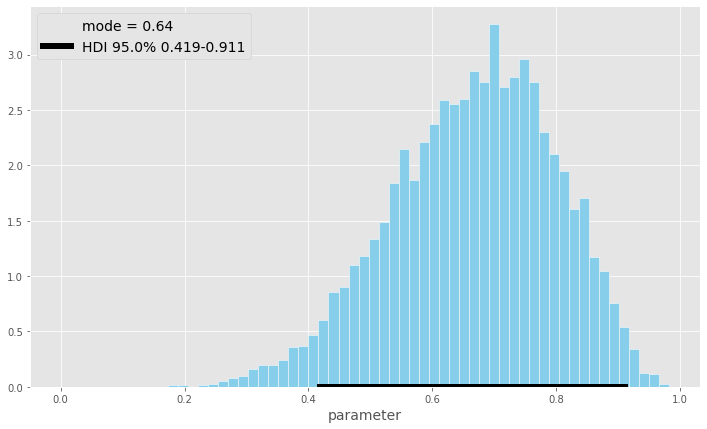

In [79]:
plot_post(trace_sample,0.95)